# Insurance Classification with Linear Regression 

Dataset: insurance | [download](https://www.kaggle.com/bmarco/health-insurance-data)

In [0]:
import io
import pandas as pd
from google.colab import files
import numpy as np

In [0]:
# To upload file and open it using pandas 
playStoreFile = files.upload()

Saving insurance.csv to insurance.csv


In [0]:
# Reading the insurance dataset
insuDTLab2 = pd.read_csv(io.StringIO(playStoreFile['insurance.csv'].decode('utf-8')))

In [0]:
# Implementing Lable Encoding for three features 
from sklearn import preprocessing
LabEnc = preprocessing.LabelEncoder()
insuDTLab2['sex'] = LabEnc.fit_transform(insuDTLab2['sex'])
insuDTLab2['smoker'] = LabEnc.fit_transform(insuDTLab2['smoker'])
insuDTLab2['region'] = LabEnc.fit_transform(insuDTLab2['region'])

In [0]:
# To show the correlation with the target
import numpy as np
import seaborn as sns
InsuDTCorrs = insuDTLab2.corr()['charges'].abs()
columns = InsuDTCorrs[InsuDTCorrs > .1].index
InsuDTCorrs = InsuDTCorrs.filter(columns)
print(InsuDTCorrs)

age        0.299008
bmi        0.198341
smoker     0.787251
charges    1.000000
Name: charges, dtype: float64


In [0]:
# Split the features and the target
# insuDTLab2 = insuDTLab2.values
xTrain_insuDTLab2 = insuDTLab2[:,[0,4]]
yTrain_insuDTLab2 = insuDTLab2[:,6]

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc_insuDTLab2 = MinMaxScaler()
xTrain_insuDTLab2 = sc_insuDTLab2.fit_transform(xTrain_insuDTLab2)
yTrain_insuDTLab2 = yTrain_insuDTLab2.reshape(-1,1)
yTrain_insuDTLab2 = sc_insuDTLab2.fit_transform(yTrain_insuDTLab2)

In [0]:
from sklearn.model_selection import train_test_split
from keras_preprocessing import sequence

X_trainLab2, x_testLab2, Y_trainLab2, y_testLab2 = train_test_split(xTrain_insuDTLab2, yTrain_insuDTLab2,
                                                    test_size=0.25, random_state=87)

In [0]:
X_trainLab2.shape

(1003, 2)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
import keras
from keras.layers.embeddings import Embedding
import tensorflow
#Creating the model
np.random.seed(155)
insuDTLab2Model = Sequential() # create model
insuDTLab2Model.add(Dense(50, input_dim=2, activation='relu')) # hidden layer
# insuDTLab2Model.add(Dropout(rate = 0.1)) 
insuDTLab2Model.add(Dense(15, activation='relu')) # hidden layer
# insuDTLab2Model.add(Dropout(p = 0.1)) 
insuDTLab2Model.add(Dense(30, activation='relu')) # hidden layer
# insuDTLab2Model.add(Dropout(p = 0.1)) 
insuDTLab2Model.add(Dense(1, activation='sigmoid')) # output layer
insuDTLab2Model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
from tensorflow import keras

TensorBoardLab2 = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

insuDTModel = insuDTLab2Model.fit(X_trainLab2, Y_trainLab2, epochs=50, verbose=1,
                                     initial_epoch=0, callbacks=[TensorBoardLab2])

Epoch 1/50
1003/1003 [==============================] - 2s 2ms/step - loss: 0.1229
Epoch 2/50
1003/1003 [==============================] - 0s 110us/step - loss: 0.0864
Epoch 3/50
1003/1003 [==============================] - 0s 123us/step - loss: 0.0420
Epoch 4/50
1003/1003 [==============================] - 0s 110us/step - loss: 0.0212
Epoch 5/50
1003/1003 [==============================] - 0s 113us/step - loss: 0.0164
Epoch 6/50
1003/1003 [==============================] - 0s 126us/step - loss: 0.0139
Epoch 7/50
1003/1003 [==============================] - 0s 120us/step - loss: 0.0125
Epoch 8/50
1003/1003 [==============================] - 0s 107us/step - loss: 0.0116
Epoch 9/50
1003/1003 [==============================] - 0s 127us/step - loss: 0.0112
Epoch 10/50
1003/1003 [==============================] - 0s 116us/step - loss: 0.0110
Epoch 11/50
1003/1003 [==============================] - 0s 116us/step - loss: 0.0108
Epoch 12/50
1003/1003 [==============================] - 0s 115us

In [0]:
yPredinsuDTLab2 = insuDTLab2Model.predict(x_testLab2)

In [0]:
# Implementation for model evaluation
import sklearn.metrics, math
print("\n")
print("R square:                 %f" % sklearn.metrics.r2_score(y_testLab2, yPredinsuDTLab2))
print("Mean absolute error:      %f" % sklearn.metrics.mean_absolute_error(y_testLab2, yPredinsuDTLab2))
print("Mean squared error:       %f" % sklearn.metrics.mean_squared_error(y_testLab2, yPredinsuDTLab2))
print("Root mean squared error : %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_testLab2, yPredinsuDTLab2)))



R square:                 0.690544
Mean absolute error:      0.068856
Mean squared error:       0.010088
Root mean squared error : 0.100439


# Plot the loss and then change the below parameter and report your view how the result changes in each case
a.	learning rate

b.	batch size

c.	optimizer

d.	activation function


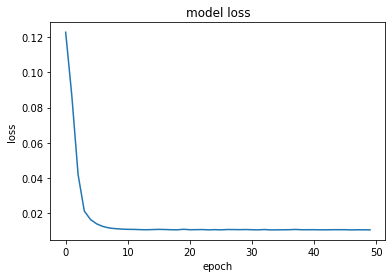

In [0]:
import matplotlib.pyplot as plt
plt.plot(insuDTModel.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
import keras
from keras.layers.embeddings import Embedding
import tensorflow
from keras.optimizers import SGD
lrLab2, decayLab2, momentumLab2 = 0.01, 1e-6, 0.9

sgd = SGD(lr=lrLab2, decay=decayLab2, momentum=momentumLab2, nesterov=True)

#Creating the model
np.random.seed(60)
insuDTLab2Model = Sequential() # create model
insuDTLab2Model.add(Dense(50, input_dim=2, activation='tanh')) # hidden layer
insuDTLab2Model.add(Dropout(rate = 0.1)) 
insuDTLab2Model.add(Dense(15, activation='relu')) # hidden layer
insuDTLab2Model.add(Dense(30, activation='relu')) # hidden layer
insuDTLab2Model.add(Dense(1, activation='sigmoid')) # output layer
insuDTLab2Model.compile(loss='mean_squared_error', optimizer=sgd)

In [0]:
from tensorflow import keras
TensorBoardLab2 = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

insuDTModel = insuDTLab2Model.fit(X_trainLab2, Y_trainLab2, epochs=50, batch_size=3, verbose=1,
                                     initial_epoch=0, callbacks=[TensorBoardLab2])

Epoch 1/50
1003/1003 [==============================] - 3s 3ms/step - loss: 0.0379
Epoch 2/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0128
Epoch 3/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0116
Epoch 4/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0116
Epoch 5/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 6/50
1003/1003 [==============================] - 1s 993us/step - loss: 0.0114
Epoch 7/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 8/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 9/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 10/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0109
Epoch 11/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0111
Epoch 12/50
1003/1003 [==============================] - 1s 1ms/step - loss: 0.0110

In [0]:
yPredinsuDTLab2 = insuDTLab2Model.predict(x_testLab2)

In [0]:
# Implementation for model evaluation
import sklearn.metrics, math
print("\n")
print("R square:                 %f" % sklearn.metrics.r2_score(y_testLab2, yPredinsuDTLab2))
print("Mean absolute error:      %f" % sklearn.metrics.mean_absolute_error(y_testLab2, yPredinsuDTLab2))
print("Mean squared error:       %f" % sklearn.metrics.mean_squared_error(y_testLab2, yPredinsuDTLab2))
print("Root mean squared error : %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_testLab2, yPredinsuDTLab2)))



R square:                 0.673350
Mean absolute error:      0.069241
Mean squared error:       0.010649
Root mean squared error : 0.103192


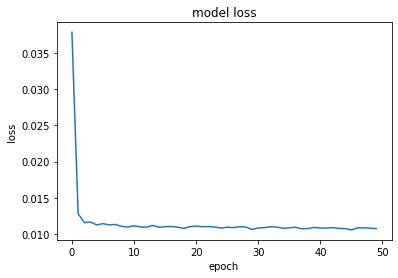

In [0]:
import matplotlib.pyplot as pltLab2
pltLab2.plot(insuDTModel.history['loss'])
pltLab2.title('model loss')
pltLab2.ylabel('loss')
pltLab2.xlabel('epoch')
pltLab2.show()